# Chapter 04. CNN architectures(1)

경희대학교 Hyper동아리에서 사용하는 자료입니다<br>
제작 : 소프트웨어융합학과 문희준<br>
무단으로 자료의 배포 및 유출을 금합니다<br>

2012년 딥러닝의 발전히 급격하게 이루어지면서, **CNN**을 기반으로 한 정교화된 분류 시스템을 향한 연구가 많이 이루어졌습니다.<br>
특히 **ImageNet 분류 대회**를 통해 다양한 모델들이 제시되었습니다<br>
이번 chatper에서는 다양한 CNN 모델을 살펴보도록 하겠습니다<br>




---

# 1. LeNet-5
1998년 LeCun에 의해 소개된 LeNet-5는 5개의 layer로 구성되어 있습니다.
**5X5 Conv filter(stride 1) 가 적용되었습니다. 또한 Pooling layer는 2X2 size이며, stride 2가 적용되었습니다.**<br>
LeNet-5의 구조는 아래와 같습니다. 

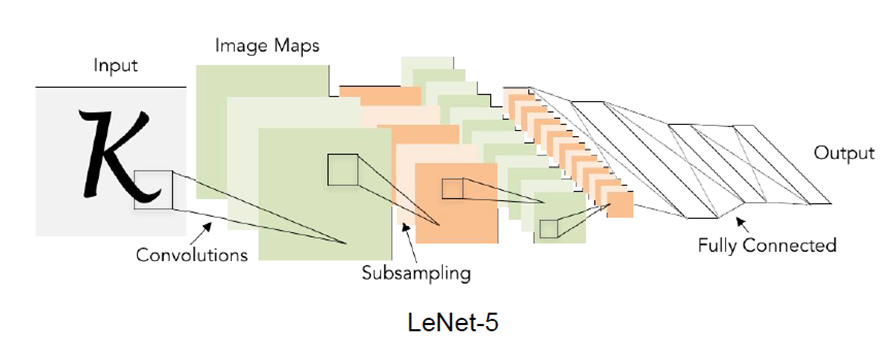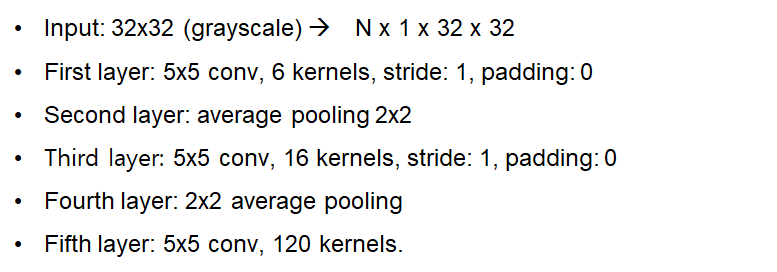

Keras를 이용하여 직접 LeNet-5를 구현해 보겠습니다.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Model, Sequential

class LeNet5(Sequential):

  def __init__(self, input_shape, num_classes):
    super().__init__()
    
    # 1st Block(Input + Conv2D + Avg_pooling)
    self.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), padding='same', 
                 activation='relu', # 원래의 제시에서는 tanh로 제시되었으나, 모델의 성능을 위해 제가 relu로 바꿨습니다.
                 input_shape=input_shape))
    self.add(AveragePooling2D(pool_size=(2,2)))

    # 2nd Block(Conv2D + Avg_pooling)
    self.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
    self.add(AveragePooling2D(pool_size=(2,2)))

    # FC layer
    self.add(Flatten()) # 2D -> 1D vectors
    self.add(Dense(120, activation='relu'))
    self.add(Dense(84, activation='relu'))
    self.add(Dense(num_classes, activation='softmax'))            

LeNet-5 모델을 인스턴스화 하고, 정보를 출력해보겠습니다

In [2]:
# 논문에 제안된 img width, height은 32 X 32이나, 아래의 fashion_MNIST의 img는 28 X 28 사이즈이므로, 조정해주었습니다.
img_height = 28
img_width = 28 
img_channels = 1
input_shape = (img_height, img_width, img_channels)
num_classes = 10 # 10개의 의류 class

# Build model
model = LeNet5(input_shape=input_shape, num_classes=num_classes)

# Print model Info
print(model.summary())

Model: "le_net5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               94200     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1016

모델을 compile한 이후, fashion-mnist 데이터에 대해 훈련시켜보겠습니다.


In [3]:
# load data
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# normalize data
X_train, X_test = X_train.astype('float32')/255.0, X_test.astype('float32')/255.0 
X_train, X_test = X_train.reshape(-1,*input_shape), X_test.reshape(-1, *input_shape) 

# Make labels to one-hot encoding labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [4]:
# build model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5285 - accuracy: 0.8063 - val_loss: 0.4115 - val_accuracy: 0.8529
Epoch 2/20
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3583 - accuracy: 0.8682 - val_loss: 0.3590 - val_accuracy: 0.8657
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3148 - accuracy: 0.8847 - val_loss: 0.3244 - val_accuracy: 0.8805
Epoch 4/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2833 - accuracy: 0.8938 - val_loss: 0.3100 - val_accuracy: 0.8858
Epoch 5/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2620 - accuracy: 0.9014 - val_loss: 0.3082 - val_accuracy: 0.8865
Epoch 6/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2432 - accuracy: 0.9083 - val_loss: 0.2839 - val_accuracy: 0.8937
Epoch 7/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2260 - accuracy: 0.9145 - val_loss: 0.2940 -

위에서 훈련 시킨 모델을 토대로, 모델의 분류 결과를 시각화 해보겠습니다!

/Users/hayoon/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


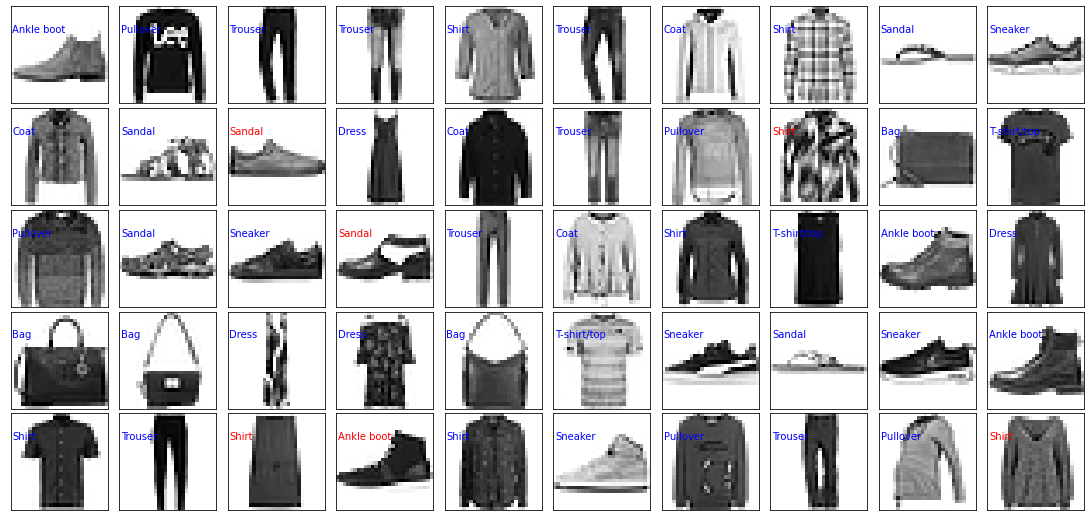

In [5]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Prediction
prediction_values = model.predict_classes(X_test)

# figure(그리기) 위한 set up
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot 50 images with prediction
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')
  
     # If correct, label the image with the blue text
    if prediction_values[i] == np.argmax(y_test[i]):
        ax.text(0, 7, class_names[prediction_values[i]], color='blue')
    # If wrong, label the image with the red text
    else:
        ax.text(0, 7, class_names[prediction_values[i]], color='red')

위의 결과를 살펴보면은 50개의 이미지에서 2개의 잘못 분류된 것을 확인할 수 있었습니다.<br>
위와 같이 LeNet-5를 이용하여 이미지 분류를 해보았습니다.



---
# 2. AlexNet
AlexNet은 2012년 ImageNet challenge에서 제시된 모델입니다.
첫 CNN based의 우승작이었습니다.<br>
AlexNet의 구조는 아래와 같습니다


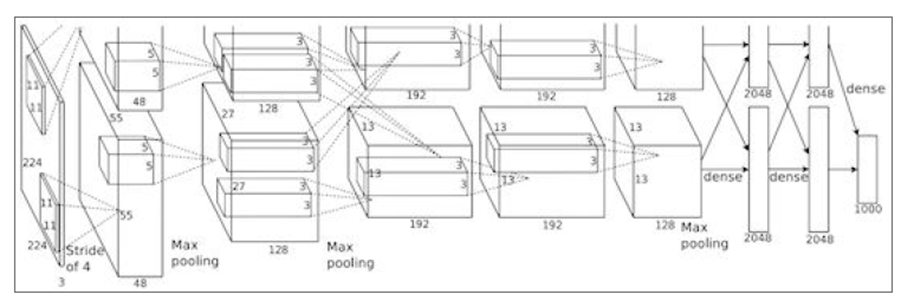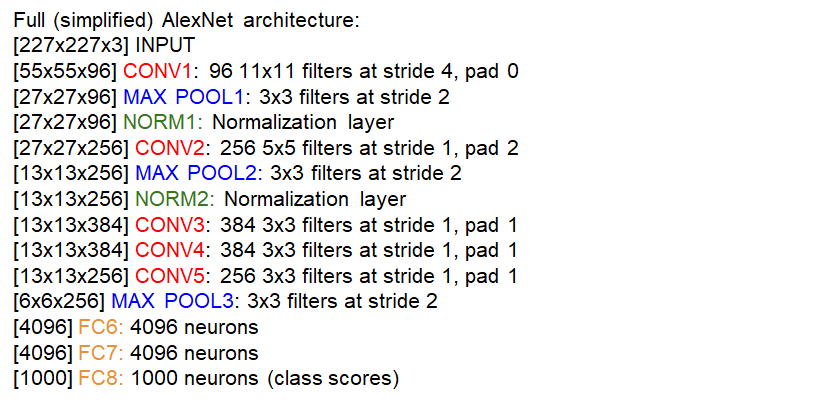

이 역시 마찬가지로 Keras를 이용하여 직접 구현하여 보겠습니다.
```python
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential

class AlexNet(Sequential):

  def __init__(self, input_shape=(227,227,3), num_classes):
    super().__init__()
    
    # 1st Block(Input + Conv2D + MaxPooling + Normalization)
    self.add(Conv2D(96, kernel_size=(11,11), strides=4, activation='relu', input_shape=input_shape))
    self.add(MaxPooling2D(pool_size=(3,3)), strides=(2,2))
    self.add(BatchNormalization())

    # 2nd Block(Input + Conv2D + MaxPooling + Normalization)
    self.add(Conv2D(256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))
    self.add(MaxPooling2D(pool_size=(3,3)), strides=(2,2))
    self.add(BatchNormalization())

    # 3rd Block(Conv2D)
    self.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    self.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    self.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    self.add(MaxPooling2D(pool_size=(3,3)), strides=(2,2))

    # FC layer
    self.add(Flatten()) # 2D -> 1D vectors
    self.add(Dense(4096, activation='relu'))
    self.add(Dropout(0.5))
    self.add(Dense(4096, activation='relu'))
```

처음 제시된 AlexNet의 구현은 위와 같습니다.<br>
cifar-10의 image 크기는 32 X 32이므로 AlexNet8을 이용하여 훈련시켜보겠습니다

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential

class AlexNet8(Sequential):

  def __init__(self, input_shape, num_classes):
    super().__init__()
    
    # 1st Block(Input + Conv2D + MaxPooling + Normalization)
    self.add(Conv2D(96, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape))
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))


    # 2nd Block(Input + Conv2D + MaxPooling + Normalization)
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    

    # 3rd Block(Conv2D)
    self.add(Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

    # FC layer
    self.add(Flatten()) # 2D -> 1D vectors
    self.add(Dense(2048, activation='relu'))
    self.add(Dropout(0.5))
    self.add(Dense(2048, activation='relu'))
    self.add(Dropout(0.5))
    self.add(Dense(num_classes, activation='softmax'))

이번에는 cifar-10 dataset을 이용하여 모델을 훈련시켜보겠습니다

In [7]:
# load data
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize data
X_train, X_test = X_train/255.0, X_test/255.0 

# Make labels to one-hot encoding labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

170500096/170498071 [==============================] - 53s 0us/step
X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 10)
y_test shape: (10000, 10)


Model을 compile하고 summary를 출력해 보겠습니다.

In [8]:
img_height = 32
img_width = 32
img_channels = 3
input_shape = (img_height, img_width, img_channels)
num_classes = 10 

# Build model
model = AlexNet8(input_shape=input_shape, num_classes=num_classes)

# Print model Info
print(model.summary())

Model: "alex_net8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       221440    
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 384)         88

이제 모델을 훈련시켜보겠습니다!

In [9]:
# build model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 736s 470ms/step - loss: 1.5663 - accuracy: 0.4330 - val_loss: 1.4295 - val_accuracy: 0.4889
Epoch 2/50
1563/1563 [==============================] - 729s 466ms/step - loss: 1.2495 - accuracy: 0.5630 - val_loss: 1.4430 - val_accuracy: 0.4997
Epoch 3/50
1563/1563 [==============================] - 752s 481ms/step - loss: 1.1315 - accuracy: 0.6092 - val_loss: 1.1205 - val_accuracy: 0.6106
Epoch 4/50
1563/1563 [==============================] - 731s 468ms/step - loss: 1.0584 - accuracy: 0.6393 - val_loss: 1.5271 - val_accuracy: 0.4900
Epoch 5/50
1563/1563 [==============================] - 736s 471ms/step - loss: 0.9963 - accuracy: 0.6626 - val_loss: 1.0318 - val_accuracy: 0.6414
Epoch 6/50
1563/1563 [==============================] - 746s 477ms/step - loss: 0.9442 - accuracy: 0.6815 - val_loss: 1.0659 - val_accuracy: 0.6335
Epoch 7/50
1563/1563 [==============================] - 770s 493ms/step - loss: 0.9055 - accuracy: 0.6944 - val_

위에서 훈련 시킨 모델을 토대로, 모델의 분류 결과를 시각화 해보겠습니다!

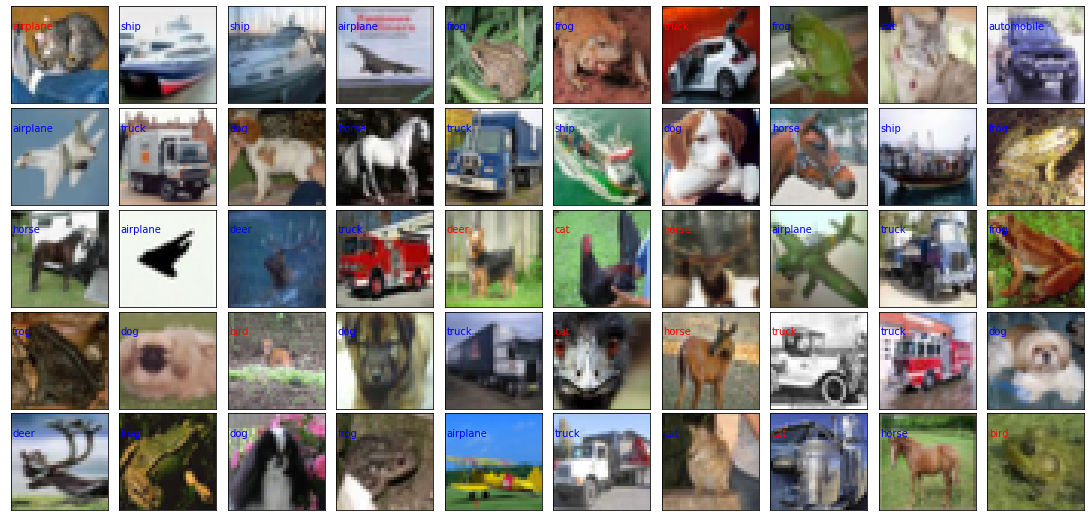

In [10]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Prediction
prediction_values = model.predict_classes(X_test)

# figure(그리기) 위한 set up
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot 50 images with prediction
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((32,32,3)),cmap=plt.cm.gray_r, interpolation='nearest')
  
     # If correct, label the image with the blue text
    if prediction_values[i] == np.argmax(y_test[i]):
        ax.text(0, 7, class_names[prediction_values[i]], color='blue')
    # If wrong, label the image with the red text
    else:
        ax.text(0, 7, class_names[prediction_values[i]], color='red')

위의 결과를 살펴보면 생각보다 많이 못 맞춘것을 확인할 수 있었습니다<br>
성능을 더욱 높이기 위해서는 **image augmentaion**을 통해 원본 샘플을 무작위로 변형시켜, 훈련 이미지를 확대해야 합니다<br><br>

**AlexNet이 남긴 의미는 다음과 같이 설명할 수 있습니다**<br>
1. 활성화 함수에서 처음으로 **ReLU 함수를 도입하였습니다. 이를 통해 기존 sigmoid, tanh에서 발생하는 vanishing gradient 문제를 해결하였습니다**<br>
2. **CNN에 Dropout을 적용하였습니다**
3. 합성곱(convolution layer)과 Pooling layer, Dense layer, Flatten layer를 도입한 전형적인 CNN 계층구조를 갖습니다

# 3. VGG

VGG는 2014년 Imagenet 분류대회에서 2등을 차지하였습니다만, 이 모델이 제시한 기법은 수많은 후속 연구에 영향을 끼쳤습니다<br>
VGG는 AlexNet이 달성했던 16.4%의 오차율을 7.3%로 획기적으로 개선하였습니다.<br>
VGG의 아키텍쳐는 아래와 같습니다.

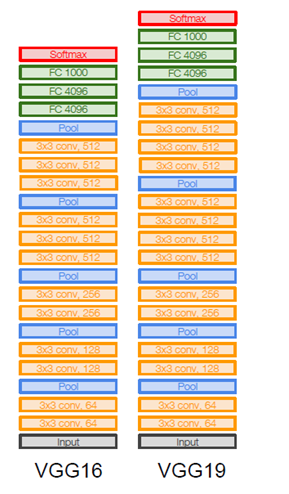

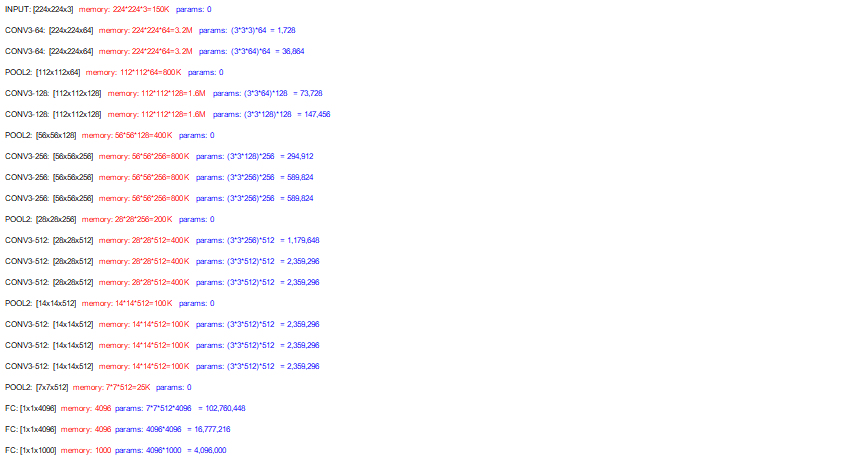

**지금까지 가장 성능이 우수해 지금도 보편적으로 사용되는 아키텍쳐는 VGG-16, VGG-19입니다.**<br>
16과 19는 아키텍의 깊이(훈련 가능한 layer 갯수)를 의미합니다.<br>
그럼 VGG가 남긴 의미는 무엇일까요? 지금부터 자세하게 설명드리겠습니다<br>

## 1. 규모가 큰 합성곱을 여러 작은 합성곱으로 대체
3X3 커널을 갖는 두 합성곱 계층은 5X5 커널의 합성곱 계층 1개와 **같은 Receptive Field(수용 영역)**을 갖습니다<br>
이를 확장시켜보면, 3x3 계층을 3개 연속으로 배치하면 7x7 1개, 3x3를 4개 연속으로 배치하면 9x9 1개와 같은 수용영역을 갖습니다<br>
**즉, 큰 거 1개를 작은 3x3로 쪼개는 것입니다. 일종의 divide & conquer 개념입니다**<br>
이렇게 잘게 쪼개면 2가지의 이점이 있습니다<br><br>
첫 번째로, **매개변수를 줄이는 것입니다.** 실제로 11x11의 매개변수 갯수는 121개이지만, 3x3 5개의 변수는 3x3x5 = 45개 밖에 되지 않습니다. 매개변수가 적을수록 **최적화가 용이하고, 학습도 적게 시킬 수 있으며, 무엇보다 overfitting 억제가 가능합니다**<br><br>

두 번째로는 **비선형성을 증가시키는 것입니다.** 합성곱 layer수가 많아질수록, **ReLu 같은 '비선형' 활성화 함수가 많아지게 되어서, 비선형 연산이 많아져, 네트워크가 복잡한 특징을 학습할 수 있는 능력이 증대됩니다.**

## 2. 특징 맵 깊이를 증가
합성곱 연산층에서 커널의 갯수를 늘림으로써, output의 depth(커널 연산 결과)가 깊어지게 됩니다. 이를 통해 더 복잡하고 차별적인 특징을 활용하는 인코더를 사용할 수 있습니다.

## 3. 척도 변경을 통한 데이터 보강
원본 이미지를 아래와 같이 다양하게 **resizing, cropping, flipping**하면서 여러개의 이미지를 추가로 만듭니다<br>
이를 통해서 **모델이 학습할 데이터 수가 증가하면서, 모델은 다양한 이미지 척도에 대해 분류하는 방법을 학습하게 됩니다. 그 결과, 더욱 더 견고한 모델을 만들 수 있습니다**<br>

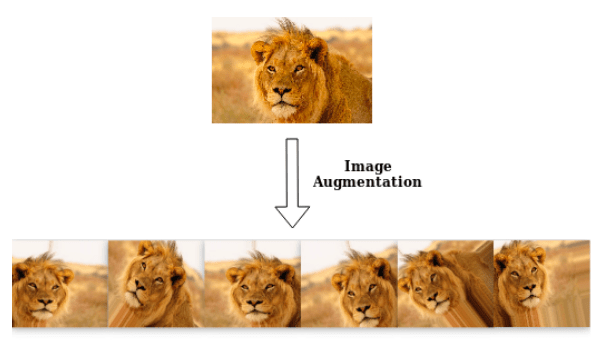

## 4. 완전 연결 계층(FC layer)을 합성곱 계층으로 대체
전통적인 VGG 아키텍쳐는 마지막에 여러 개의 **완전 연결 계층**을 둡니다<br>
하지만 이후에 제안된 **VGG 아키텍쳐는 밀집 계층을 합성곱 계층으로 대체합니다**<br>
이러한 밀집 계층을 두지 않는 네트워크를 **완전 합성곱 계층(Fully convolutional network)라 부릅니다.<br>**
또한 다양한 크기의 이미지에 적용될 수 있습니다.

이제 Keras를 이용하여 직접 구현해 보겠습니다.<br>
```python
class VGG_16(Sequential):

  def __init__(self, input_shape, num_classes):
    super().__init__()
    
    # 1st Block(Input + Conv2D + Conv2D + MaxPooling)
    self.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape))
    self.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # 2nd Block(Conv2D + Conv2D + MaxPooling)
    self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))              
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    # 3rd Block(Conv2D + Conv2D +  Conv2D + MaxPooling)
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
              
    # 4th Block(Conv2D + Conv2D + Conv2D + MaxPooling)
    self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
              
    # 5th Block(Conv2D + Conv2D + Conv2D + MaxPooling)
    self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
              
    # 6th Block(FC layer
    self.add(Flatten())
    self.add(Dense(4096, activation='relu'))
    self.add(Dense(4096, activation='relu'))
    self.add(Dense(num_classes, activation='softmax'))
```
실제 논문에서 제시된 VGG16의 구조는 위와 같습니다.<br>

**Tensorflow에서는 라이브러리에 직접 VGG16을 구현하였습니다.<br>
위와 같이 일일이 정의해 주지 않아도 다음과 같이 사용할 수 있습니다<br>**
```python
vgg_net = tf.keras.applications.VGG16(
    include_top=True, # 구현되어있는 VGG의 Dense layer를 포함한다는 뜻입니다. False의 경우 새로운 Dense layer를 추가해줘야합니다
    weights='imagenet', # imagenet으로 사전 훈련된 weight값을 초기 weight로 갖는다는 뜻입니다
    input_tensor=None, # 입력으로 받는 tensor
    input_shpae=None, # 입력으로 받는 input의 shape(구조)를 의미합니다
    poooling=None, # pooling의 종류를 의미합니다. 'max', 'avg'...
    classes=1000 # 분류할 class의 숫자를 의미합니다
)
```
아래의 모델은 작은 이미지 사이즈로 인하여 수정한 VGG16입니다.

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential

class cifar10_VGG16(Sequential):

  def __init__(self, input_shape, num_classes):
    super().__init__()
    
    # 1st Block(Input + Conv2D + Conv2D + MaxPooling)
    self.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape))
    self.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    self.add(Dropout(0.4))

    # 2nd Block(Conv2D + Conv2D + MaxPooling)
    self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))   
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    self.add(Dropout(0.4))
    
    # 3rd Block(Conv2D + Conv2D + MaxPooling)
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))    
    self.add(BatchNormalization())    
    self.add(Dropout(0.5))
              
    # 6th Block(FC layer
    self.add(Flatten())
    self.add(Dense(256, activation='relu'))
    self.add(Dropout(0.5))
    self.add(Dense(256, activation='relu'))
    self.add(Dropout(0.5))
    self.add(Dense(num_classes, activation='softmax'))

만든 모델의 정보를 출력해보겠습니다.

In [12]:
# cifar-10 info
img_height = 32
img_width = 32
img_channels = 3
input_shape = (img_height, img_width, img_channels)
num_classes = 10 

# Build model
model = cifar10_VGG16(input_shape=input_shape, num_classes=num_classes)

# Print model Info
print(model.summary())

Model: "cifar10_vg_g16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)    

이제 모델을 compile한 이후에, 훈련시켜 보겠습니다!

In [13]:
# load data
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize data
X_train, X_test = X_train/255.0, X_test/255.0 

# Make labels to one-hot encoding labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [14]:
# build model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 551s 352ms/step - loss: 1.9826 - accuracy: 0.2685 - val_loss: 1.7224 - val_accuracy: 0.3847
Epoch 2/20
1563/1563 [==============================] - 542s 347ms/step - loss: 1.5443 - accuracy: 0.4348 - val_loss: 1.5931 - val_accuracy: 0.4341
Epoch 3/20
1563/1563 [==============================] - 530s 339ms/step - loss: 1.3176 - accuracy: 0.5367 - val_loss: 1.0917 - val_accuracy: 0.6204
Epoch 4/20
1563/1563 [==============================] - 606s 388ms/step - loss: 1.1541 - accuracy: 0.6019 - val_loss: 1.3150 - val_accuracy: 0.5697
Epoch 5/20
1563/1563 [==============================] - 626s 400ms/step - loss: 1.0517 - accuracy: 0.6457 - val_loss: 0.9109 - val_accuracy: 0.6852
Epoch 6/20
1563/1563 [==============================] - 646s 414ms/step - loss: 0.9724 - accuracy: 0.6737 - val_loss: 0.8989 - val_accuracy: 0.7084
Epoch 7/20
1563/1563 [==============================] - 639s 409ms/step - loss: 0.9080 - accuracy: 0.6976 - val_

모델의 분류 결과를 시각해 보겠습니다

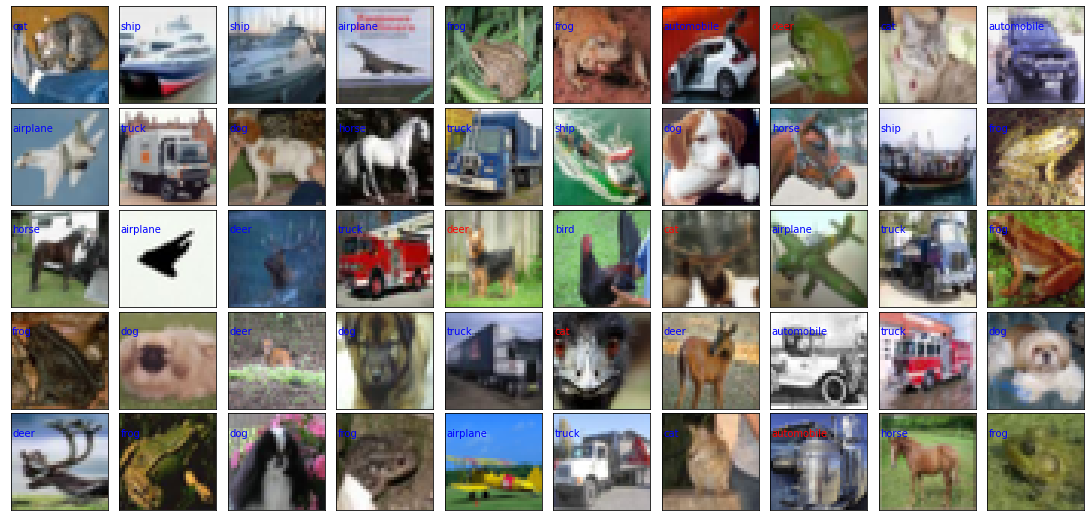

In [15]:
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Prediction
prediction_values = model.predict_classes(X_test)

# figure(그리기) 위한 set up
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot 50 images with prediction
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((32,32,3)),cmap=plt.cm.gray_r, interpolation='nearest')
  
     # If correct, label the image with the blue text
    if prediction_values[i] == np.argmax(y_test[i]):
        ax.text(0, 7, class_names[prediction_values[i]], color='blue')
    # If wrong, label the image with the red text
    else:
        ax.text(0, 7, class_names[prediction_values[i]], color='red')

앞선 AlexNet보다 개선된 성능을 보여줍니다.<br>
그러나 VGG 역시 network가 깊어질수록, **backpropagation에 필요한 gradient값이 뒤에서 앞으로 갈수록 감소한다는 문제(Vanishing gradient)가 발생합니다**<br>
이로 인하여 overfitting과 같은 문제가 발생합니다.

# LAB
3가지 CNN 아키텍쳐와 다양한 dataset을 가지고 모델을 학습시켜 보았습니다<br>
이제 여러분들은 위의 코드들을 변형하여, 더 많은 아키텍쳐와 dataset을 가지고 하실 수 있을 겁니다<br>
이번 실습은 위에 설명되어 있는 각 모델을 직접 구현해보고, 훈련시켜보는 것입니다<br>

In [1]:
# LeNet
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Model, Sequential

class LeNet5(Sequential):

  def __init__(self, input_shape, num_classes):
    super().__init__()
    
    self.add(Conv2D(6, kernel_size = (5,5), strides = (1,1), padding = 'same', 
                 activation = 'relu',
                 input_shape = input_shape))
    self.add(AveragePooling2D(pool_size = (2,2)))

    self.add(Conv2D(16, kernel_size = (5,5), strides = (1,1), padding = 'same',
                 activation = 'relu',
                 input_shape = input_shape))
    self.add(AveragePooling2D(pool_size = (2,2)))

    self.add(Flatten())
    self.add(Dense(120, activation='relu'))
    self.add(Dense(84, activation='relu'))
    self.add(Dense(num_classes, activation='softmax'))   
    
img_height = 28
img_width = 28 
img_channels = 1
input_shape = (img_height, img_width, img_channels)
num_classes = 10

model = LeNet5(input_shape = input_shape, num_classes = num_classes)

import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0 
x_train, x_test = x_train.reshape(-1,*input_shape), x_test.reshape(-1, *input_shape) 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train, batch_size = 32, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 24s 12ms/step - loss: 0.5422 - accuracy: 0.8022 - val_loss: 0.4138 - val_accuracy: 0.8481
Epoch 2/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3583 - accuracy: 0.8694 - val_loss: 0.3508 - val_accuracy: 0.8702
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3086 - accuracy: 0.8853 - val_loss: 0.3232 - val_accuracy: 0.8807
Epoch 4/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2753 - accuracy: 0.8980 - val_loss: 0.2980 - val_accuracy: 0.8928
Epoch 5/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2523 - accuracy: 0.9056 - val_loss: 0.2817 - val_accuracy: 0.8964
Epoch 6/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2298 - accuracy: 0.9122 - val_loss: 0.2677 - val_accuracy: 0.9001
Epoch 7/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2150 - accuracy: 0.9194 - val_loss: 0.2552 -

In [2]:
# AlexNet
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential

class AlexNet(Sequential):

  def __init__(self, input_shape, num_classes):
    super().__init__()
    
    self.add(Conv2D(96, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape=input_shape))
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size = (3,3), strides = (2,2)))

    self.add(Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size = (3,3), strides = (2,2)))
    
    self.add(Conv2D(384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    self.add(Conv2D(384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    self.add(Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    self.add(MaxPooling2D(pool_size = (3,3), strides = (2,2)))

    self.add(Flatten())
    self.add(Dense(2048, activation = 'relu'))
    self.add(Dropout(0.5))
    self.add(Dense(2048, activation = 'relu'))
    self.add(Dropout(0.5))
    self.add(Dense(num_classes, activation = 'softmax'))

img_height = 32
img_width = 32
img_channels = 3
input_shape = (img_height, img_width, img_channels)
num_classes = 10 
    
model = AlexNet(input_shape = input_shape, num_classes = num_classes)
    
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train, batch_size = 32, epochs = 20, validation_data = (x_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 762s 487ms/step - loss: 1.6211 - accuracy: 0.4053 - val_loss: 1.9980 - val_accuracy: 0.2949
Epoch 2/20
1563/1563 [==============================] - 841s 538ms/step - loss: 1.2966 - accuracy: 0.5409 - val_loss: 1.4251 - val_accuracy: 0.5136
Epoch 3/20
1563/1563 [==============================] - 1049s 671ms/step - loss: 1.1556 - accuracy: 0.5967 - val_loss: 1.1237 - val_accuracy: 0.6150
Epoch 4/20
1563/1563 [==============================] - 1120s 717ms/step - loss: 1.0708 - accuracy: 0.6303 - val_loss: 1.3265 - val_accuracy: 0.5355
Epoch 5/20
1563/1563 [==============================] - 1049s 671ms/step - loss: 0.9949 - accuracy: 0.6573 - val_loss: 1.1475 - val_accuracy: 0.6055
Epoch 6/20
1563/1563 [==============================] - 947s 606ms/step - loss: 0.9624 - accuracy: 0.6730 - val_loss: 1.0461 - val_accuracy: 0.6400
Epoch 7/20
1563/1563 [==============================] - 808s 517ms/step - loss: 0.9159 - accuracy: 0.6908 - v

In [3]:
# VGG16
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential

class cifar10_VGG16(Sequential):

  def __init__(self, input_shape, num_classes):
    super().__init__()
    
    self.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape=input_shape))
    self.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    self.add(Dropout(0.4))

    self.add(Conv2D(128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    self.add(Conv2D(128, kernel_size = (3,3), padding = 'same', activation = 'relu'))   
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    self.add(Dropout(0.4))
    
    self.add(Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    self.add(Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    self.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))    
    self.add(BatchNormalization())    
    self.add(Dropout(0.5))
              
    self.add(Flatten())
    self.add(Dense(256, activation = 'relu'))
    self.add(Dropout(0.5))
    self.add(Dense(256, activation = 'relu'))
    self.add(Dropout(0.5))
    self.add(Dense(num_classes, activation = 'softmax'))
    
img_height = 32
img_width = 32
img_channels = 3
input_shape = (img_height, img_width, img_channels)
num_classes = 10 

model = cifar10_VGG16(input_shape=input_shape, num_classes=num_classes)

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train, batch_size = 32, epochs = 20, validation_data = (x_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 625s 399ms/step - loss: 1.9876 - accuracy: 0.2683 - val_loss: 1.6748 - val_accuracy: 0.3382
Epoch 2/20
1563/1563 [==============================] - 676s 432ms/step - loss: 1.5402 - accuracy: 0.4359 - val_loss: 1.3567 - val_accuracy: 0.5113
Epoch 3/20
1563/1563 [==============================] - 732s 468ms/step - loss: 1.3141 - accuracy: 0.5381 - val_loss: 1.0681 - val_accuracy: 0.6343
Epoch 4/20
1563/1563 [==============================] - 726s 464ms/step - loss: 1.1580 - accuracy: 0.6023 - val_loss: 1.0060 - val_accuracy: 0.6580
Epoch 5/20
1563/1563 [==============================] - 923s 590ms/step - loss: 1.0502 - accuracy: 0.6438 - val_loss: 0.9731 - val_accuracy: 0.6584
Epoch 6/20
1563/1563 [==============================] - 929s 594ms/step - loss: 0.9719 - accuracy: 0.6748 - val_loss: 0.8400 - val_accuracy: 0.7161
Epoch 7/20
1563/1563 [==============================] - 810s 518ms/step - loss: 0.9092 - accuracy: 0.6971 - val_

# Reference
- 실전! 텐서플로 2로 배우는 컴퓨터 비전 딥러닝 chapter 03
- 경희대학교 소프트웨어융합학과 로봇센서데이터 수업 lecture note

## 수고하셨습니다^^
